<a href="https://colab.research.google.com/github/SyedHuzaifa007/The-Sparks-Foundation-Task-4/blob/main/Exploratory_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Necessary Libraries And Modules
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Filter Warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Data
path = '/content/drive/MyDrive/Sparks Foundation Internship/Datasets/globalterrorism.csv'
data = pd.read_csv(path, encoding ='latin1')
terror_df = pd.DataFrame(data)
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# Choosing Necessary Features
terror_df = terror_df[['iyear', 'imonth', 'iday', 'country_txt', 'provstate', 'city', 'region_txt', 'attacktype1_txt', 'target1', 'nkill', 'nwound', 'summary', 'gname', 'targtype1_txt', 'weaptype1_txt', 'motive']]

In [5]:
# Renaming Choosen Feature For My Easiness
terror_df = terror_df.rename(columns = {'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'country', 'provstate':'state', 
                                        'region_txt':'region', 'attacktype1_txt':'attack_type', 'target1':'target', 'nkill':'killed',
                                        'nwound':'wounded', 'gname':'group', 'targtype1_txt':'target_type', 'weaptype1_txt':'weapon_type'})
terror_df.head()

,year,month,day,country,state,city,region,attack_type,target,killed,wounded,summary,group,target_type,weapon_type,motive
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,Mexico city,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Athens,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [6]:
terror_df.to_csv('/content/drive/MyDrive/Sparks Foundation Internship/Datasets/terror.csv')


In [7]:
# Checking Shape of Dataset
terror_df.shape   

(181691, 16)

In [8]:
# Checking Dataset For Null Values
terror_df.isnull().sum()

year                0
month               0
day                 0
country             0
state             421
city              434
region              0
attack_type         0
target            636
killed          10313
wounded         16311
summary         66129
group               0
target_type         0
weapon_type         0
motive         131130
dtype: int64

In [9]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   city         181257 non-null  object 
 6   region       181691 non-null  object 
 7   attack_type  181691 non-null  object 
 8   target       181055 non-null  object 
 9   killed       171378 non-null  float64
 10  wounded      165380 non-null  float64
 11  summary      115562 non-null  object 
 12  group        181691 non-null  object 
 13  target_type  181691 non-null  object 
 14  weapon_type  181691 non-null  object 
 15  motive       50561 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 22.2+ MB


###**That's Great, Our Finalized Dataset Contains No Null Values**

In [10]:
# Checking Some Important Descriptions of Data
terror_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,181691,NaN,NaN,NaN,2002.64,13.2594,1970,1991,2009,2014,2017
month,181691,NaN,NaN,NaN,6.46728,3.3883,0,4,6,9,12
day,181691,NaN,NaN,NaN,15.5056,8.81404,0,8,15,23,31
country,181691,205,Iraq,24636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,181270,2855,Baghdad,7645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,181257,36674,Unknown,9775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,181691,12,Middle East & North Africa,50474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attack_type,181691,9,Bombing/Explosion,88255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,181055,86006,Civilians,6461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
killed,171378,NaN,NaN,NaN,2.40327,11.5457,0,0,0,2,1570


####**Actually, This Above Matrix Is The Whole Data Analysis As We Can See Hot Zone of Terrorism And Its Details.**

##**Exploratory Data Analysis**
Let's Check Which Country Faced Most Attacks And Try To Find Its Details.

In [11]:
print('Country Which Faced Most Attacks: ',terror_df['country'].value_counts().idxmax())
print('City Which Faced Most Attacks: ',terror_df['city'].value_counts().index[1])
print("Region Which Faced Most Attacks:",terror_df['region'].value_counts().idxmax())
print("Year In Which Most Attacks Occur:",terror_df['year'].value_counts().idxmax())
print("Month In Which Most Attacks Occur:",terror_df['month'].value_counts().idxmax())
print("Group Which Conducted Most Attacks:",terror_df['group'].value_counts().index[1])
print("Most Attack Types:",terror_df['attack_type'].value_counts().idxmax())

Country Which Faced Most Attacks:  Iraq
City Which Faced Most Attacks:  Baghdad
Region Which Faced Most Attacks: Middle East & North Africa
Year In Which Most Attacks Occur: 2014
Month In Which Most Attacks Occur: 5
Group Which Conducted Most Attacks: Taliban
Most Attack Types: Bombing/Explosion


In [12]:
terror_df['year'].value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: year, dtype: int64

##  Visualizations

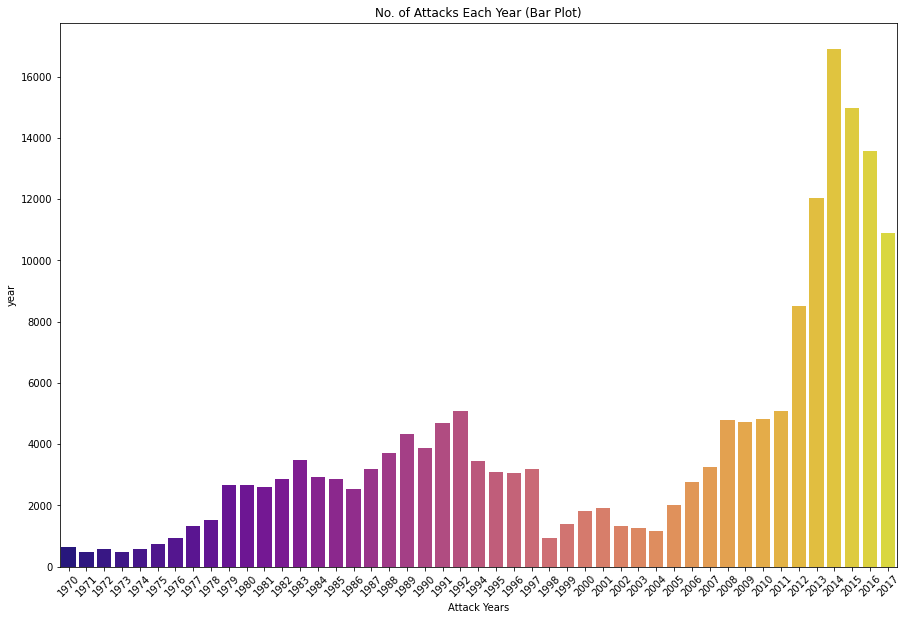

In [29]:
# Bar Plot Graph
x_plot = terror_df['year'].unique()
y_plot = terror_df['year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15,10))
plt.title("No. of Attacks Each Year (Bar Plot)")
plt.ylabel("No. of Attacks")
plt.xlabel("Attack Years")
plt.xticks(rotation = 45)
sns.barplot(x = x_plot, y = y_plot, palette= 'plasma')
plt.show()

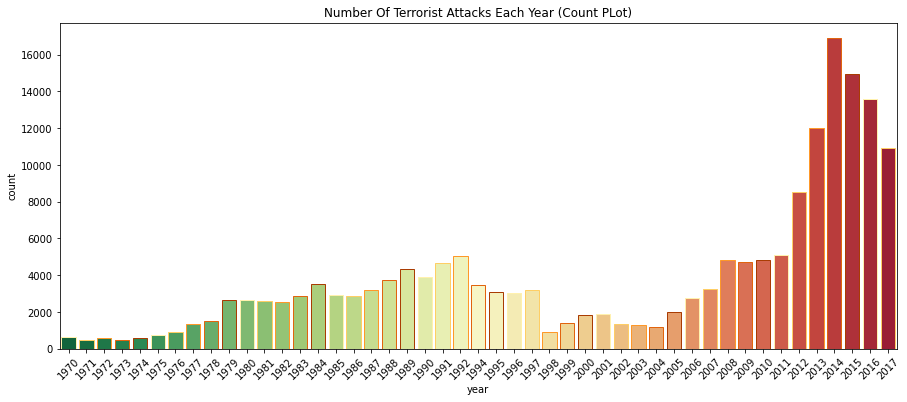

In [32]:
#Count Plot Graph
plt.subplots(figsize=(15,6))
sns.countplot('year', data=terror_df, palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Attacks Each Year (Count PLot)')
plt.show()

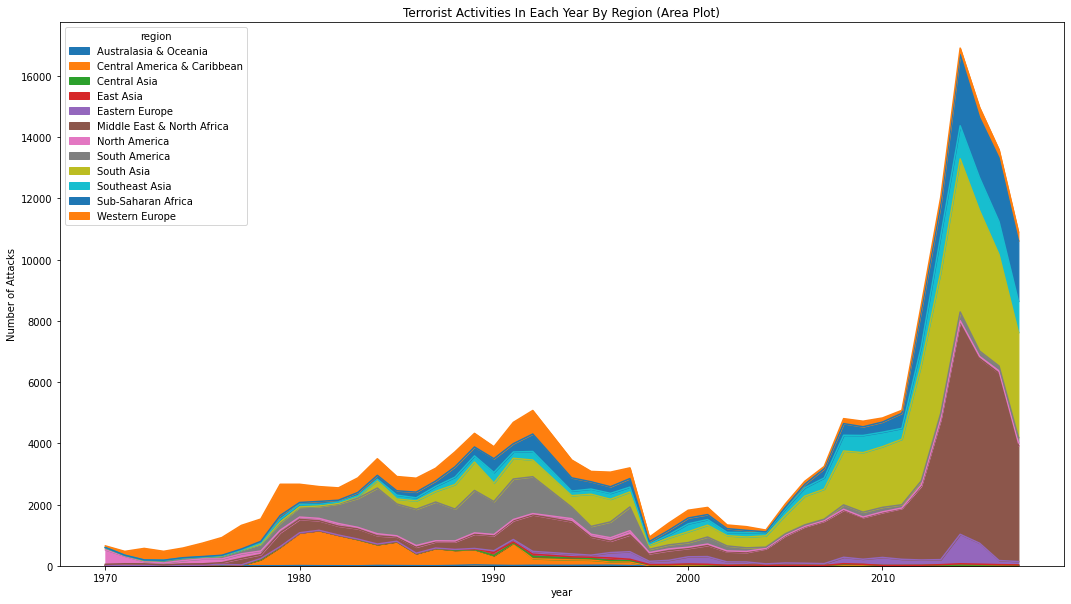

In [36]:
#Area Plot Graph
pd.crosstab(terror_df.year,terror_df.region).plot(kind='area',figsize=(18,10))
plt.title('Terrorist Activities In Each Year By Region (Area Plot)')
plt.ylabel("Number of Attacks")
plt.show()